# Deep Learning with Keras

Originally created by Dr. [Jian Tao](https://orcid.org/0000-0003-4228-6089), Texas A&M University

June 2, 2021

Deep Learning (DL) is one cagegory of machine learning methods that are based on artificial neural networks to improve computer algorithms automatically through data.

DL methods can be devided into:

* Supervised Learning
    * trained with labeled data; including regression and classification problems
* Unsupervised Learning
    * trained with unlabeled data; clustering and association rule learning problems.
* Reinforcement Learning
    * no training data; stochastic Markov decision process; robotics and self-driving cars.

DL methods are useful primarily for the following reasons:

* DL is computationally expensive, but it is capable of handling high dimensional data.
* feature extraction is done automatically.

![Deep Learning](./images/deeplearning.svg)

## 2. Keras
Keras is an open-source neural-network library written in Python. It is capable of running on top of TensorFlow, Microsoft Cognitive Toolkit (CNTK), or Theano.
* Designed for fast experimentation with deep neural networks;
* Focuses on being user-friendly, modular, and extensible;
* TensorFlow 2.X adopted almost entirely Keras APIs and the TensorFlow backend (tf.keras) was recommended as the major release of * multi-backend Keras ceased at Version 2.3.0.
* Keras -> tf.keras in the future.
![Keras Workflow](./images/keras_workflow.svg)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1.1 Linear Regression

#### The data points to be fitted

In [2]:
x = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0], dtype = float)
y = 3.0 * x + 2.0 + 0.5 * np.random.randn(len(x))

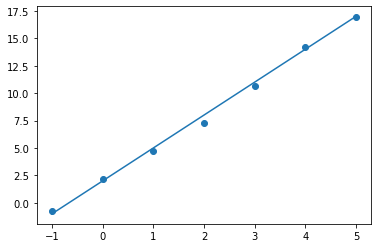

In [3]:
plt.scatter(x,y);
plt.plot(x, 3*x+2);

#### Review Linear Regression with scikit-learn 

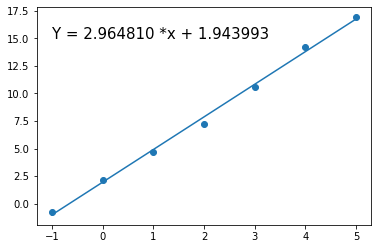

In [39]:
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression()

# use the data points defined above
sk_x = x[:, np.newaxis]
sk_y = y

# fit the model with sklearn
sk_model.fit(sk_x, sk_y);

# make predictions
sk_yfit = sk_model.predict(sk_x)

# plot the fitted line with the equation
plt.scatter(sk_x,sk_y);
plt.plot(sk_x, sk_yfit);
plt.text(-1.0, 15, r"Y = %f *x + %f"%(sk_model.coef_, sk_model.intercept_), fontsize=15);

#### Linear Regression with Keras

In [40]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential(Dense(units=1, input_shape=[1]))
model.compile (optimizer='sgd', loss='mean_squared_error')
model.fit(x,y,epochs=500, verbose=0);

In [41]:
yfit = model.predict(x)

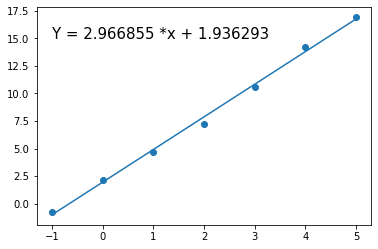

In [42]:
plt.scatter(x, y);
plt.plot(x, yfit);
plt.text(-1.0, 15, r"Y = %f *x + %f"%(tuple(model.get_weights())), fontsize=15);

### 1.2 Classify Handwritten Digits with Keras
Layers are the fundamental building blocks of Keras models. A wide variety of Keras functions are dedicated to create different kind of layers and connect them to form a deep learning network.

In [43]:
from tensorflow.keras import utils, callbacks, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Flatten
import os, datetime

In [44]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

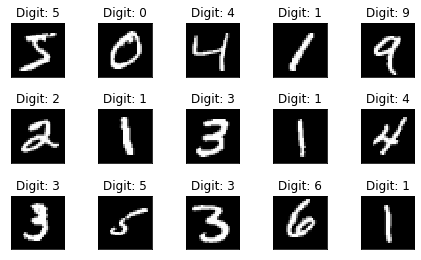

In [45]:
# show the first image in the data set
#plt.imshow(x_train[0], cmap="gray") # Import the image
#plt.show() # Plot the image

# show the first 15 images in the data set.
fig = plt.figure()
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [46]:
# Normalize the train dataset
x_train = utils.normalize(x_train, axis=1)
# Normalize the test dataset
x_test = utils.normalize(x_test, axis=1)

In [47]:
#Build the model object
model = Sequential()
# Add the Flatten Layer
model.add(Flatten())
# Build the input and the hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
# Build the output layer
model.add(Dense(10, activation='softmax'))

In [48]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [49]:
# This is needed for loading Tensorboard.
log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [50]:
model.fit(x=x_train, y=y_train, epochs=1, callbacks=[tensorboard_callback]) # Start training process

1875/1875 [==============================] - 5s 3ms/step - loss: 0.2599 - accuracy: 0.9234


In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          multiple                  0         
_________________________________________________________________
dense_8 (Dense)              multiple                  100480    
_________________________________________________________________
dense_9 (Dense)              multiple                  16512     
_________________________________________________________________
dense_10 (Dense)             multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9621999859809875


In [53]:
# Save model into MNIST.h5 and we are all done with the training now.
model.save('MNIST.h5')

In [54]:
model = models.load_model('MNIST.h5')

In [55]:
predictions = model.predict(x_test)

In [56]:
# function that plots a single image.
def test_digit(i):
  plt.imshow(x_test[i], interpolation='none')
  plt.title("digit:%d   prediction: %d" %(y_test[i], np.argmax(predictions[i])))
  plt.xticks([])
  plt.yticks([])    

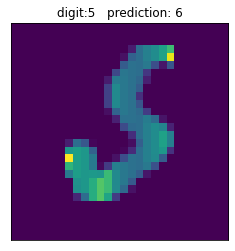

In [57]:
# let's output the images which were not predicted correctly.
for i in range(len(x_test)):
    if np.argmax(predictions[i]) != y_test[i]:
        test_digit(i)